In [196]:
import numpy as np
import matplotlib.pyplot as plt
import lshlink as lsh
from IPython.display import HTML

In [197]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [ ]:
##### EXPERIMENT 1 #####

In [119]:
# generate linearly separable data

np.random.seed(123)

d1 = np.random.multivariate_normal(
    mean = np.array([1, 1]),
    cov = np.diag((0.01, 0.01)),
    size = 20
)

d2 = np.random.multivariate_normal(
    mean = np.array([2, 2]),
    cov = np.diag((0.01, 0.01)),
    size = 20
)

d3 = np.random.multivariate_normal(
    mean = np.array([3, 3]),
    cov = np.diag((0.01, 0.01)),
    size = 20
)

d4 = np.random.multivariate_normal(
    mean = np.array([2, 4]),
    cov = np.diag((0.01, 0.01)),
    size = 20
)

d5 = np.random.multivariate_normal(
    mean = np.array([1, 5]),
    cov = np.diag((0.01, 0.01)),
    size = 20
)


d6 = np.random.multivariate_normal(
    mean = np.array([6, 1]),
    cov = np.diag((0.01, 0.01)),
    size = 20
)

d7 = np.random.multivariate_normal(
    mean = np.array([5, 2]),
    cov = np.diag((0.01, 0.01)),
    size = 20
)

d8 = np.random.multivariate_normal(
    mean = np.array([4, 3]),
    cov = np.diag((0.01, 0.01)),
    size = 20
)

d9 = np.random.multivariate_normal(
    mean = np.array([5, 4]),
    cov = np.diag((0.01, 0.01)),
    size = 20
)

d10 = np.random.multivariate_normal(
    mean = np.array([6, 5]),
    cov = np.diag((0.01, 0.01)),
    size = 20
)

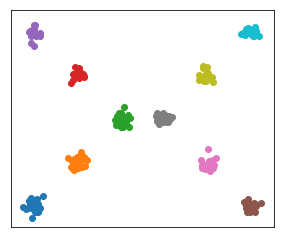

In [120]:
plt.scatter(d1[:, 0], d1[:, 1])
plt.scatter(d2[:, 0], d2[:, 1])
plt.scatter(d3[:, 0], d3[:, 1])
plt.scatter(d4[:, 0], d4[:, 1])
plt.scatter(d5[:, 0], d5[:, 1])
plt.scatter(d6[:, 0], d6[:, 1])
plt.scatter(d7[:, 0], d7[:, 1])
plt.scatter(d8[:, 0], d8[:, 1])
plt.scatter(d9[:, 0], d9[:, 1])
plt.scatter(d10[:, 0], d10[:, 1])
plt.axis('square')
plt.ylim((0.5, 5.5))
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

In [121]:
data = np.round(np.concatenate((d1, d2, d3, d4, d5, d6, d7, d8, d9, d10), axis = 0) * 10)

In [148]:
np.savetxt("tencircles.csv", data, delimiter=",")

In [122]:
clusters = lsh.LSHLink(data, 1.4, 10, 100, cutoff=10)

In [123]:
g1 = np.where(clusters == np.unique(clusters)[0])[0]
g2 = np.where(clusters == np.unique(clusters)[1])[0]
g3 = np.where(clusters == np.unique(clusters)[2])[0]
g4 = np.where(clusters == np.unique(clusters)[3])[0]
g5 = np.where(clusters == np.unique(clusters)[4])[0]
g6 = np.where(clusters == np.unique(clusters)[5])[0]
g7 = np.where(clusters == np.unique(clusters)[6])[0]
g8 = np.where(clusters == np.unique(clusters)[7])[0]
g9 = np.where(clusters == np.unique(clusters)[8])[0]
g10 = np.where(clusters == np.unique(clusters)[9])[0]

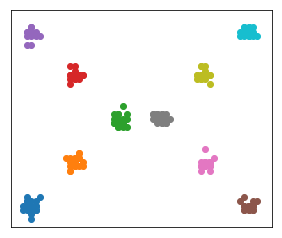

In [124]:
plt.scatter(data[g1,0], data[g1,1])
plt.scatter(data[g2,0], data[g2,1])
plt.scatter(data[g3,0], data[g3,1])
plt.scatter(data[g4,0], data[g4,1])
plt.scatter(data[g5,0], data[g5,1])
plt.scatter(data[g6,0], data[g6,1])
plt.scatter(data[g7,0], data[g7,1])
plt.scatter(data[g8,0], data[g8,1])
plt.scatter(data[g9,0], data[g9,1])
plt.scatter(data[g10,0], data[g10,1])
plt.axis('square')
plt.ylim((5, 55))
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

In [125]:
##### EXPERIMENT 2 #####

In [126]:
spirals = np.round(np.genfromtxt('spirals.csv', delimiter=",")[1:, 1:] * 100)
spirals += np.abs(np.min(spirals))

In [127]:
spirals.shape

(300, 2)

In [128]:
clusters2 = lsh.LSHLink(spirals, 1.4, 10, 100, cutoff=2)

In [136]:
len(np.unique(clusters2))

2

In [130]:
a1 = np.where(clusters2 == np.unique(clusters2)[0])[0]
a2 = np.where(clusters2 == np.unique(clusters2)[1])[0]

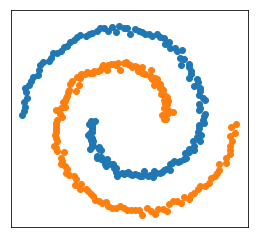

In [131]:
plt.scatter(spirals[a1,0], spirals[a1,1])
plt.scatter(spirals[a2,0], spirals[a2,1])
plt.axis('square')
plt.ylim((0, 200))
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

In [191]:
def plot_clusters(raw, scale, A, k, l, cutoff):
    data = np.round(raw * scale)
    data += np.abs(np.min(data))
    
    clusters = lsh.LSHLink(data, A, k, l, cutoff=cutoff, seed1=5, seed2=6)
    num_clusters = len(np.unique(clusters))
    
    for i in range(num_clusters):
        x = np.where(clusters == np.unique(clusters)[i])[0]
        plt.scatter(raw[x, 0], raw[x, 1])
    plt.axis('square')
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.show()
    
    return

In [236]:
def plot_clusters(raw, cutoff, scale=1, linkage='LSH', **kwargs):
    '''
    Plots data into clusters using either locality-sensitive hashing
    or single-linkage methods for agglomerative hierarchical clustering.
    
    -----------
    Parameters:
    -----------
    raw (ndarray): d-dimensional array of size n
    cutoff (int): for LSH, the minimum number of clusters to return;
        for single-linkage, the precise number of clusters to return
    scale (float): [optional] number to scale data, if necessary
    linkage (string): specify either 'LSH' for locality-sensitive hashing
        or 'single-linkage' for single-linkage method
    A (float): increase ratio for r (must be > 1); required for LSH only
    k (int): [number of sampled bits for hash function; required for LSH only
    l (int): number of hash functions to compute; required for LSH only
    seed1 (int): [optional] specify seed for sampled data in LSHLink() to calculate r,
        if reproducibility is desired
    seed2 (int): [optional] specify seed for sampling of hashed bits in LSHLink(),
        if reproducibility is desired

    --------
    Returns:
    --------
    None
    '''

    valid = ('LSH', 'single')
    if linkage not in valid:
        raise ValueError('Linkage must be one of %s' % (valid,))

    data = raw * scale
    data += np.abs(np.min(data))

    if linkage == 'LSH':
        if not all(k in kwargs for k in ('A', 'k', 'l')):
            raise KeyError("if linkage == 'LSH', must provide 'A', 'k', and 'l'")

        clusters = lsh.LSHLink(
            data,
            kwargs['A'],
            kwargs['k'],
            kwargs['l'],
            cutoff=cutoff,
            seed1=5,
            seed2=6
        )

    else:
        clusters = lsh.hac(
            cutoff,
            data
        )

    num_clusters = len(np.unique(clusters))
    
    for i in range(num_clusters):
        x = np.where(clusters == np.unique(clusters)[i])[0]
        plt.scatter(raw[x, 0], raw[x, 1])
    plt.axis('square')
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.show()
    
    return

In [249]:
def plot_square(data):
    plt.scatter(data[:, 0], data[:, 1])
    plt.axis('square')
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.show()
    
    return

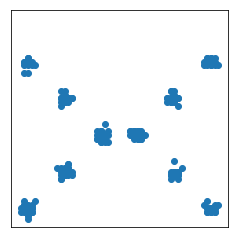

In [250]:
plot_square(tencircles)

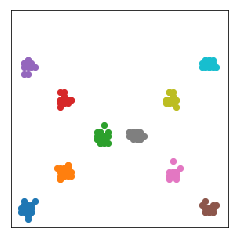

In [237]:
tencircles = np.genfromtxt('tencircles.csv', delimiter=",")
plot_clusters(tencircles, cutoff=10, scale=10, linkage='LSH', A=1.4, k=10, l=100)

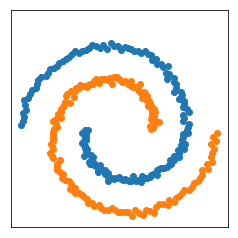

In [238]:
spirals = np.genfromtxt('spirals.csv', delimiter=",")[1:, 1:]
plot_clusters(spirals, cutoff=2, scale=100, linkage='LSH', A=1.4, k=10, l=100)

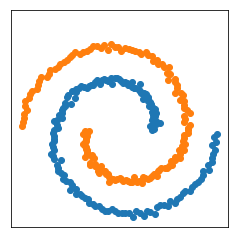

In [239]:
plot_clusters(spirals, cutoff=2, scale=100, linkage='single')

In [3]:
import numpy as np

In [5]:
smiley = np.genfromtxt('smiley.csv', delimiter=",")[1:, 1:]
smiley

array([[-7.34586828e-01,  1.01032728e+00],
       [-8.71715719e-01,  9.67212767e-01],
       [-9.07153190e-01,  9.96596064e-01],
       [-7.91010057e-01,  9.51967918e-01],
       [-6.65022504e-01,  9.51702185e-01],
       [-6.48306650e-01,  1.06432555e+00],
       [-6.97226086e-01,  1.05398826e+00],
       [-9.45240570e-01,  1.11364763e+00],
       [-6.97517266e-01,  9.17259870e-01],
       [-9.21457189e-01,  8.11071100e-01],
       [-8.06730030e-01,  1.00763110e+00],
       [-6.84776793e-01,  1.03601289e+00],
       [-8.50024988e-01,  1.01013756e+00],
       [-6.78666449e-01,  9.65376630e-01],
       [-6.57477381e-01,  9.69928581e-01],
       [-6.60978447e-01,  9.41972193e-01],
       [-6.59682021e-01,  1.09718202e+00],
       [-7.62556206e-01,  9.40684983e-01],
       [-8.17626901e-01,  1.09657075e+00],
       [-8.22830682e-01,  7.65913836e-01],
       [-7.44374239e-01,  1.02642996e+00],
       [-7.68205360e-01,  1.06862564e+00],
       [-8.90902215e-01,  1.12491171e+00],
       [-9.

In [4]:
plot_clusters(smiley, cutoff=4, scale=100, linkage='LSH', A=1.4, k=10, l=100)

NameError: name 'plot_clusters' is not defined

In [235]:
tencircles.shape

(200, 2)

In [132]:
##### EXPERIMENT 3 #####

In [133]:
smiley = np.round(np.genfromtxt('smiley.csv', delimiter=",")[1:, 1:] * 100)
smiley += np.abs(np.min(smiley))

In [134]:
clusters3 = lsh.LSHLink(smiley, 1.4, 10, 100, cutoff=4)

In [135]:
len(np.unique(clusters3))

4

In [145]:
b1 = np.where(clusters3 == np.unique(clusters3)[0])[0]
b2 = np.where(clusters3 == np.unique(clusters3)[1])[0]
b3 = np.where(clusters3 == np.unique(clusters3)[2])[0]
b4 = np.where(clusters3 == np.unique(clusters3)[3])[0]

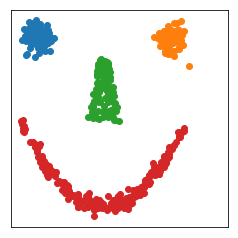

In [146]:
plt.scatter(smiley[b1,0], smiley[b1,1])
plt.scatter(smiley[b2,0], smiley[b2,1])
plt.scatter(smiley[b3,0], smiley[b3,1])
plt.scatter(smiley[b4,0], smiley[b4,1])
plt.axis('square')
#plt.ylim((0, 200))
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()